In [1]:
import pandas as pd

# Read in the data
df = pd.read_csv('./eda_logs.csv')
df.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   strategy      5432 non-null   object 
 1   n_clients     5432 non-null   int64  
 2   backend       5432 non-null   object 
 3   client_bool   5432 non-null   bool   
 4   client_num    3560 non-null   float64
 5   metric        5432 non-null   object 
 6   metric_value  5432 non-null   float64
 7   timestamp     4280 non-null   object 
 8   round         5432 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 344.9+ KB


In [3]:
#time to see the accuracies
df.metric.unique()

array(['cpu_utilization_fit', 'cpu_utilization_evaluate',
       'fit_progress_loss', 'fit_progress_accuracy', 'losses_distributed',
       'losses_centralized', 'metrics_centralized'], dtype=object)

In [4]:
#first graph is seeing the cpu usage over time so we will keep rows that str.contains cpu_utilization in the metric column
df_cpu_util = df[df['metric'].str.contains('cpu_utilization')]
df_cpu_util.head()

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
0,FedAvg,2,jax,False,1.0,cpu_utilization_fit,86.3,2023-12-01 20:25:51,1
1,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.6,2023-12-01 20:26:48,1
2,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:28:58,2
3,FedAvg,2,jax,False,1.0,cpu_utilization_evaluate,98.9,2023-12-01 20:30:13,2
4,FedAvg,2,jax,False,1.0,cpu_utilization_fit,87.1,2023-12-01 20:32:31,3


In [5]:
strategies = df_cpu_util['strategy'].unique()
strategies.sort()
strategies = strategies[::-1]
n_clients = df_cpu_util['n_clients'].unique()
backends = df_cpu_util['backend'].unique()
metrics = df_cpu_util['metric'].unique()

# ['FedAdaGrad' 'FedAvg' 'FedAdam' 'FedAvgM']
# [5 2]
# ['jax' 'tensorflow' 'torch']
# ['cpu_utilization_fit' 'cpu_utilization_evaluate']
# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(strategies)
print(n_clients)
print(backends)
print(metrics)

rounds = df_cpu_util['round'].unique()
print(rounds)



['FedAvgM' 'FedAvg' 'FedAdam' 'FedAdaGrad']
[2 5 8]
['jax' 'tensorflow' 'torch']
['cpu_utilization_fit' 'cpu_utilization_evaluate']
[ 1  2  3  4  5  6  7  8  9 10]


In [6]:
#sort the dataframe by strategy, backend, metric, n_clients, round but strategy descending
df_cpu_util = df_cpu_util.sort_values(['strategy', 'backend', 'metric', 'n_clients', 'round'], ascending=[False, True, True, True, True])

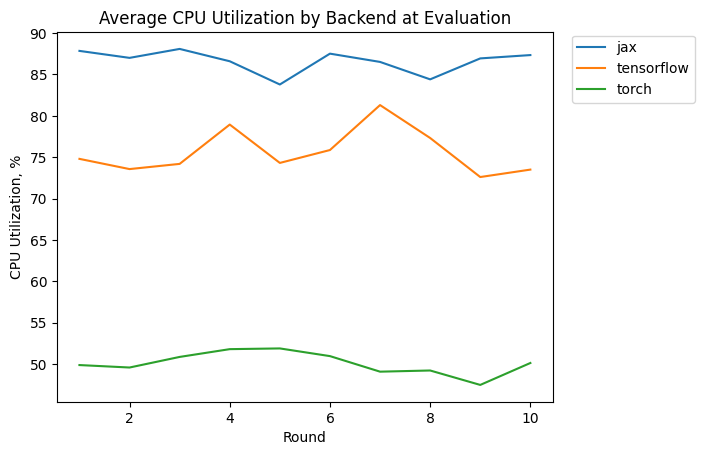

In [7]:
df_cpu_util[df_cpu_util['metric'] == 'cpu_utilization_evaluate'].\
    groupby(['round', 'backend'], as_index=False).agg({'metric_value': 'mean'}).\
    pivot(index='round', columns='backend', values='metric_value').\
    plot.line(
        title='Average CPU Utilization by Backend at Evaluation',
        xlabel='Round',
        ylabel='CPU Utilization, %'
    ).legend(loc='center right', bbox_to_anchor=(1.3, 0.9))

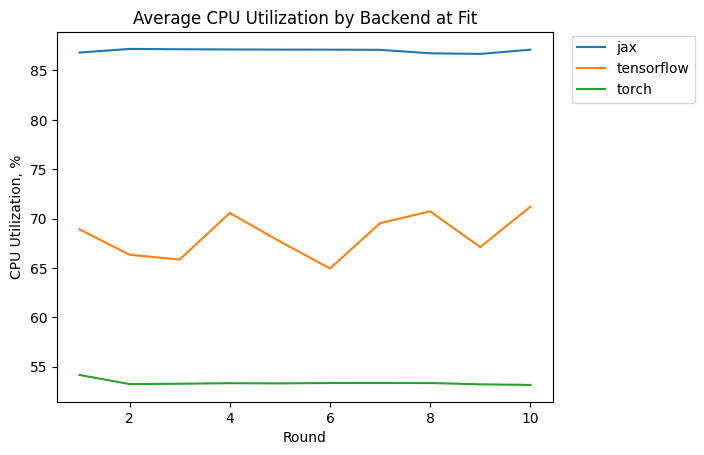

In [8]:
df_cpu_util[df_cpu_util['metric'] == 'cpu_utilization_fit'].\
    groupby(['round', 'backend'], as_index=False).agg({'metric_value': 'mean'}).\
    pivot(index='round', columns='backend', values='metric_value').\
    plot.line(
        title='Average CPU Utilization by Backend at Fit',
        xlabel='Round',
        ylabel='CPU Utilization, %'
    ).legend(loc='center right', bbox_to_anchor=(1.3, 0.9))

In [9]:
df['metric'].value_counts()

cpu_utilization_fit         1780
cpu_utilization_evaluate    1780
losses_centralized           396
metrics_centralized          396
fit_progress_loss            360
fit_progress_accuracy        360
losses_distributed           360
Name: metric, dtype: int64

In [10]:
df[df['metric'] == 'fit_progress_accuracy']

,strategy,n_clients,backend,client_bool,client_num,metric,metric_value,timestamp,round
41,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.387500,290.209763746,1
43,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.515278,495.28245861100004,2
45,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.593750,688.885122693,3
47,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.640833,901.763935505,4
49,FedAvg,2,jax,True,NaN,fit_progress_accuracy,0.675000,1105.6422122640001,5
...,...,...,...,...,...,...,...,...,...
5351,FedAdaGrad,8,torch,True,NaN,fit_progress_accuracy,0.505747,458.54733545800013,6
5353,FedAdaGrad,8,torch,True,NaN,fit_progress_accuracy,0.490509,529.7579898040001,7
5355,FedAdaGrad,8,torch,True,NaN,fit_progress_accuracy,0.476254,601.619566954,8
5357,FedAdaGrad,8,torch,True,NaN,fit_progress_accuracy,0.462891,672.87944524,9


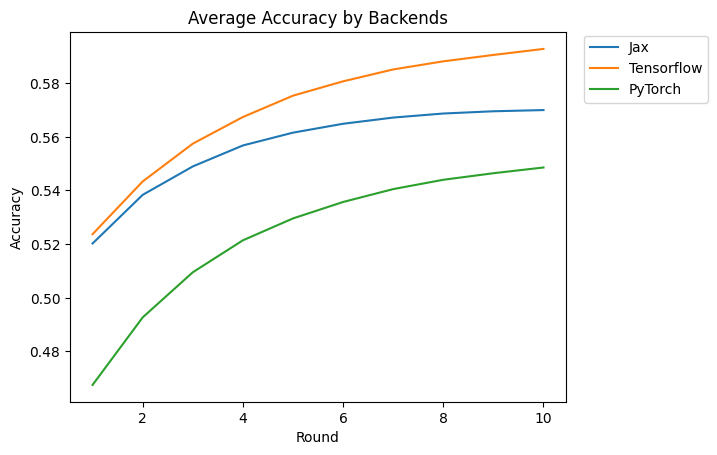

In [20]:
df[df['metric'] == 'fit_progress_accuracy'].\
    groupby(['round', 'backend'], as_index=False).agg({'metric_value': 'mean'}).\
    pivot(index='round', columns='backend', values='metric_value').\
    plot.line(
        title='Average Accuracy by Backends',
        xlabel='Round',
        ylabel='Accuracy'
    ).legend(['Jax', 'Tensorflow', 'PyTorch'], loc='center right', bbox_to_anchor=(1.3, 0.9))

In [23]:
df_time = df[df['metric'].str.contains('fit_progress_accuracy')]
df_time = df_time[['strategy', 'n_clients', 'backend', 'round', 'timestamp']]

df_time['timestamp'] = df_time['timestamp'].astype(float)

df_time['time_diff'] = df_time.sort_values(by=['strategy', 'n_clients', 'backend', 'round']).groupby(['strategy', 'n_clients', 'backend'])['timestamp'].diff()

# Handling the NaN values for the first entry of each group
df_time['time_diff'].fillna(0, inplace=True)

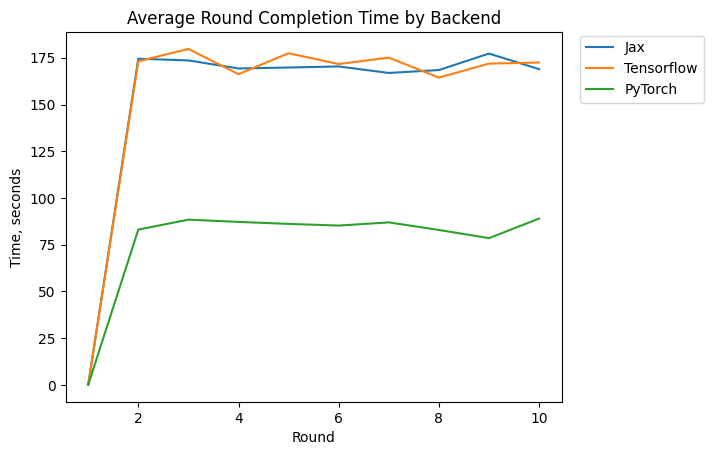

In [27]:
df_time.\
    groupby(['round', 'backend'], as_index=False).agg({'time_diff': 'mean'}).\
    pivot(index='round', columns='backend', values='time_diff').\
    plot.line(
        title='Average Round Completion Time by Backend',
        xlabel='Round',
        ylabel='Time, seconds'
    ).legend(['Jax', 'Tensorflow', 'PyTorch'], loc='center right', bbox_to_anchor=(1.3, 0.9))

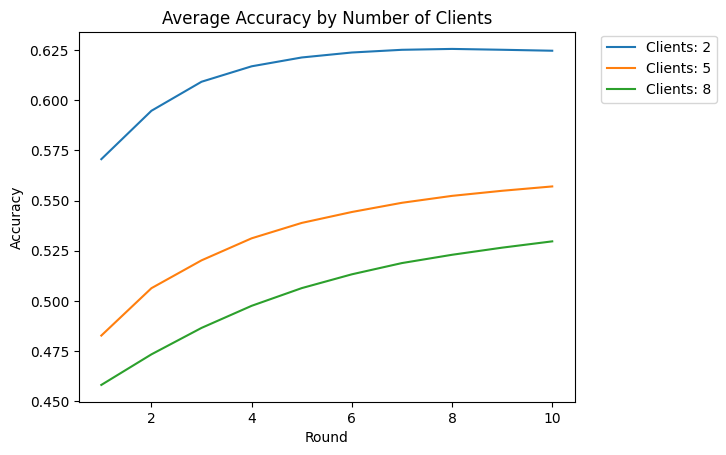

In [19]:
df[df['metric'] == 'fit_progress_accuracy'].\
    groupby(['round', 'n_clients'], as_index=False).agg({'metric_value': 'mean'}).\
    pivot(index='round', columns='n_clients', values='metric_value').\
    plot.line(
        title='Average Accuracy by Number of Clients',
        xlabel='Round',
        ylabel='Accuracy'
    ).legend(['Clients: 2', 'Clients: 5', 'Clients: 8'], loc='center right', bbox_to_anchor=(1.3, 0.9))

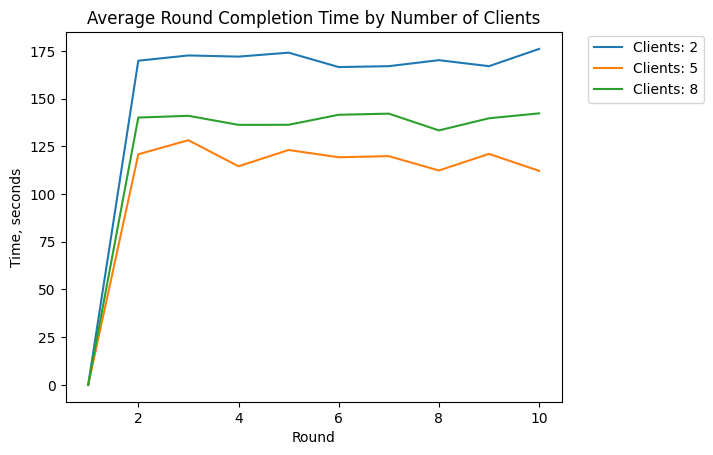

In [34]:
df_time.\
    groupby(['round', 'n_clients'], as_index=False).agg({'time_diff': 'mean'}).\
    pivot(index='round', columns='n_clients', values='time_diff').\
    plot.line(
        title='Average Round Completion Time by Number of Clients',
        xlabel='Round',
        ylabel='Time, seconds'
    ).legend(['Clients: 2', 'Clients: 5', 'Clients: 8'], loc='center right', bbox_to_anchor=(1.3, 0.9))